In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.tree import DecisionTreeRegressor


C:\Users\Harsha\AppData\Local\Programs\Python\Python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
weat_df_1=pd.read_csv('weat_df_1.csv').drop(['Unnamed: 0'],axis=1)
weat_df_2=pd.read_csv('weat_df_2.csv').drop(['Unnamed: 0'],axis=1)
weat_df_3=pd.read_csv('weat_df_3.csv').drop(['Unnamed: 0'],axis=1)

In [3]:
weat_2015=pd.read_csv('weat_rest.csv').drop(['Unnamed: 0'],axis=1)

In [4]:
#macro_df_1=macro_df_1.drop(['Monthly Nominal GDP Index (inMillion$)','Year-Month','PartyInPower','AdvertisingExpenses (in Thousand Dollars)'],axis=1)[:72]
#macro_df_2=macro_df_2.drop(['Monthly Nominal GDP Index (inMillion$)','Year-Month','PartyInPower','AdvertisingExpenses (in Thousand Dollars)'],axis=1)[:72]
#macro_df_3=macro_df_3.drop(['Monthly Nominal GDP Index (inMillion$)','Year-Month','PartyInPower','AdvertisingExpenses (in Thousand Dollars)'],axis=1)[:72]
#macro_rest=macro_rest.drop(['Monthly Nominal GDP Index (inMillion$)','PartyInPower','AdvertisingExpenses (in Thousand Dollars)'],axis=1)

In [5]:
weat_2015['Visibility\xa0(km) avg']=weat_2015['Visibility\xa0(km) avg'].replace('-',16)
weat_df_1['Visibility\xa0(km) avg']=weat_df_1['Visibility\xa0(km) avg'].replace('-',16)
weat_df_2['Visibility\xa0(km) avg']=weat_df_2['Visibility\xa0(km) avg'].replace('-',16)
weat_df_3['Visibility\xa0(km) avg']=weat_df_3['Visibility\xa0(km) avg'].replace('-',16)

In [6]:
weat_df_1['Dew Point avg (°C)']=weat_df_1['Dew Point avg (°C)'].replace('-',-3)
weat_df_2['Dew Point avg (°C)']=weat_df_2['Dew Point avg (°C)'].replace('-',-3)
weat_df_3['Dew Point avg (°C)']=weat_df_3['Dew Point avg (°C)'].replace('-',-3)
weat_df_1['Temp avg (°C)']=weat_df_1['Temp avg (°C)'].replace('-',8)
weat_df_2['Temp avg (°C)']=weat_df_2['Temp avg (°C)'].replace('-',8)
weat_df_3['Temp avg (°C)']=weat_df_3['Temp avg (°C)'].replace('-',8)
weat_df_1['Humidity\xa0(%) avg']=weat_df_1['Humidity\xa0(%) avg'].replace('-',45)
weat_df_2['Humidity\xa0(%) avg']=weat_df_2['Humidity\xa0(%) avg'].replace('-',45)
weat_df_3['Humidity\xa0(%) avg']=weat_df_3['Humidity\xa0(%) avg'].replace('-',45)
weat_df_1['Sea Level Press.\xa0(hPa) avg']=weat_df_1['Sea Level Press.\xa0(hPa) avg'].replace('-',1000)
weat_df_2['Sea Level Press.\xa0(hPa) avg']=weat_df_2['Sea Level Press.\xa0(hPa) avg'].replace('-',1000)
weat_df_3['Sea Level Press.\xa0(hPa) avg']=weat_df_3['Sea Level Press.\xa0(hPa) avg'].replace('-',1000)
weat_df_1['Wind\xa0(km/h) avg']=weat_df_1['Wind\xa0(km/h) avg'].replace('-',10)
weat_df_2['Wind\xa0(km/h) avg']=weat_df_2['Wind\xa0(km/h) avg'].replace('-',10)
weat_df_3['Wind\xa0(km/h) avg']=weat_df_3['Wind\xa0(km/h) avg'].replace('-',10)

In [7]:
weat_df_1=weat_df_1.convert_objects(convert_numeric=True)
weat_df_2=weat_df_2.convert_objects(convert_numeric=True)
weat_df_3=weat_df_3.convert_objects(convert_numeric=True)


C:\Users\Harsha\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\Harsha\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\Harsha\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific convert

In [8]:
weat_df_1.iloc[1826]=weat_df_1.iloc[1827]
weat_df_2.iloc[1826]=weat_df_2.iloc[1827]
weat_df_3.iloc[1826]=weat_df_3.iloc[1827]

In [9]:
weat_df_1[weat_df_1['Temp avg (°C)'].isnull()]

,Year,Month,Day,Temp avg (°C),Dew Point avg (°C),Humidity (%) avg,Sea Level Press. (hPa) avg,Visibility (km) avg,Wind (km/h) avg,sale


In [10]:
list(weat_df_3)#['Dew Point avg (°C)'][1125]

['Year',
 'Month',
 'Day',
 'Temp avg (°C)',
 'Dew Point avg (°C)',
 'Humidity\xa0(%) avg',
 'Sea Level Press.\xa0(hPa) avg',
 'Visibility\xa0(km) avg',
 'Wind\xa0(km/h) avg',
 'sale']

In [11]:
y_1=weat_df_1['sale']
mean_1=y_1.mean()
std_1=y_1.std()
y_1=preprocessing.scale(y_1)
x_1=weat_df_1
#x_1= preprocessing.normalize(x_1)
x_1=preprocessing.scale(x_1)
x_1_lstm=[]
y_1_lstm=[]
for i in range(x_1.shape[0]-10):
    #print(i)
    x_1_lstm.append(x_1[i:i+10])
    y_1_lstm.append(y_1[i+10])
x_1_lstm=np.array(x_1_lstm)
y_1_lstm=np.array(y_1_lstm)


In [12]:

x_train, x_test, y_train, y_test = train_test_split(x_1_lstm,y_1_lstm,test_size=0.2)


lr_1=Sequential()
lr_1.add(LSTM(1,activation='tanh',input_shape=(10, 10),return_sequences=True))
lr_1.add(LSTM(1,activation='tanh',return_sequences=False))
#lr_1.add(Dense(y_train.shape[0]))
lr_1.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
z=lr_1.fit(x_train,y_train, nb_epoch=15, batch_size=1, verbose=2,validation_data=(x_test, y_test))



C:\Users\Harsha\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1744 samples, validate on 437 samples
Epoch 1/15
 - 11s - loss: 0.6500 - acc: 0.0000e+00 - val_loss: 0.4210 - val_acc: 0.0000e+00
Epoch 2/15
 - 10s - loss: 0.3850 - acc: 0.0000e+00 - val_loss: 0.3294 - val_acc: 0.0000e+00
Epoch 3/15
 - 10s - loss: 0.3069 - acc: 0.0000e+00 - val_loss: 0.2561 - val_acc: 0.0000e+00
Epoch 4/15
 - 11s - loss: 0.2404 - acc: 0.0000e+00 - val_loss: 0.1982 - val_acc: 0.0000e+00
Epoch 5/15
 - 11s - loss: 0.1989 - acc: 0.0000e+00 - val_loss: 0.1810 - val_acc: 0.0000e+00
Epoch 6/15
 - 13s - loss: 0.1902 - acc: 0.0000e+00 - val_loss: 0.1748 - val_acc: 0.0000e+00
Epoch 7/15
 - 13s - loss: 0.1850 - acc: 0.0000e+00 - val_loss: 0.1703 - val_acc: 0.0000e+00
Epoch 8/15
 - 13s - loss: 0.1812 - acc: 0.0000e+00 - val_loss: 0.1691 - val_acc: 0.0000e+00
Epoch 9/15
 - 13s - loss: 0.1788 - acc: 0.0000e+00 - val_loss: 0.1660 - val_acc: 0.0000e+00
Epoch 10/15
 - 11s - loss: 0.1754 - acc: 0.0000e+00 - val_loss: 0.1669 - val_acc: 0.0000e+00
Epoch 11/15
 - 11s - loss: 0.175

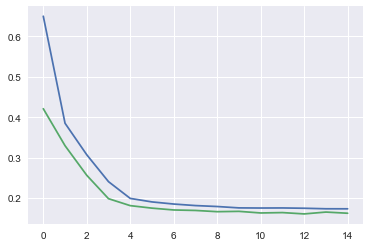

In [13]:
plt.plot(z.history['loss'],c='b')
plt.plot(z.history['val_loss'],c='g')
#plt.label('Loss')
plt.show()

In [14]:
result=lr_1.predict(x_test)#*std_1)+mean_1
#np.array(x_1[66:66+5]).reshape(1,5,14)

<function matplotlib.pyplot.show(*args, **kw)>

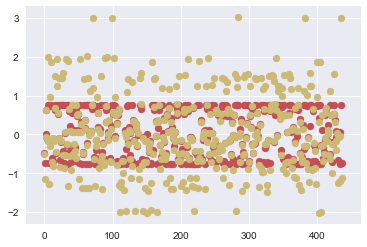

In [15]:
plt.scatter(range(y_test.shape[0]),result,c='r')
plt.scatter(range(y_test.shape[0]),y_test,c='y')
plt.show

In [16]:
x_1_lstm[1].shape

(5, 10)

In [17]:
y_2=weat_df_2['sale']
mean_2=y_2.mean()
std_2=y_2.std()
y_2=preprocessing.scale(y_2)
x_2=weat_df_2
#x_1= preprocessing.normalize(x_1)
x_2=preprocessing.scale(x_2)
x_2_lstm=[]
y_2_lstm=[]
for i in range(x_2.shape[0]-10):
    #print(i)
    x_2_lstm.append(x_2[i:i+10])
    y_2_lstm.append(y_2[i+10])
x_2_lstm=np.array(x_2_lstm)
y_2_lstm=np.array(y_2_lstm)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_2_lstm,y_2_lstm,test_size=0.2)


lr_2=Sequential()
lr_2.add(LSTM(1,activation='tanh',input_shape=(10, 10),return_sequences=True))
lr_2.add(LSTM(1,activation='tanh',return_sequences=False))
#lr_2.add(Dense(1))
lr_2.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
z=lr_2.fit(x_train,y_train, nb_epoch=20, batch_size=1, verbose=2,validation_data=(x_test, y_test))



C:\Users\Harsha\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1744 samples, validate on 437 samples
Epoch 1/20
 - 11s - loss: 0.7400 - acc: 0.0000e+00 - val_loss: 0.4447 - val_acc: 0.0000e+00
Epoch 2/20
 - 10s - loss: 0.4303 - acc: 0.0000e+00 - val_loss: 0.3496 - val_acc: 0.0000e+00
Epoch 3/20
 - 10s - loss: 0.3705 - acc: 0.0000e+00 - val_loss: 0.3221 - val_acc: 0.0000e+00
Epoch 4/20
 - 10s - loss: 0.3497 - acc: 0.0000e+00 - val_loss: 0.3040 - val_acc: 0.0000e+00
Epoch 5/20
 - 10s - loss: 0.3334 - acc: 0.0000e+00 - val_loss: 0.2903 - val_acc: 0.0000e+00
Epoch 6/20
 - 10s - loss: 0.3224 - acc: 0.0000e+00 - val_loss: 0.2833 - val_acc: 0.0000e+00
Epoch 7/20
 - 10s - loss: 0.3174 - acc: 0.0000e+00 - val_loss: 0.2778 - val_acc: 0.0000e+00
Epoch 8/20
 - 10s - loss: 0.3135 - acc: 0.0000e+00 - val_loss: 0.2747 - val_acc: 0.0000e+00
Epoch 9/20
 - 10s - loss: 0.3108 - acc: 0.0000e+00 - val_loss: 0.2716 - val_acc: 0.0000e+00
Epoch 10/20
 - 10s - loss: 0.3089 - acc: 0.0000e+00 - val_loss: 0.2703 - val_acc: 0.0000e+00
Epoch 11/20
 - 10s - loss: 0.308

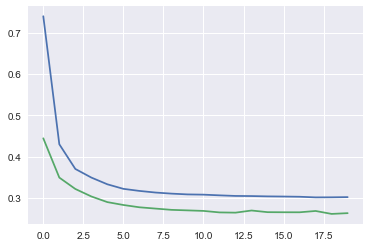

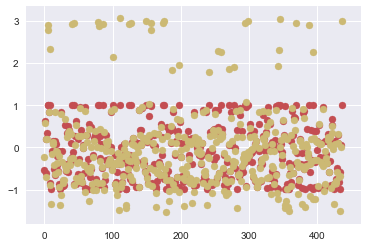

In [19]:
plt.plot(z.history['loss'])
plt.plot(z.history['val_loss'])
plt.show()
result=(lr_2.predict(x_test))
plt.scatter(range(y_test.shape[0]),result,c='r')
plt.scatter(range(y_test.shape[0]),y_test,c='y')
plt.show()

In [20]:
y_3=weat_df_3['sale']
mean_3=y_3.mean()
std_3=y_3.std()
y_3=preprocessing.scale(y_1)
x_3=weat_df_3
#x_1= preprocessing.normalize(x_1)
x_3=preprocessing.scale(x_3)
x_3_lstm=[]
y_3_lstm=[]
for i in range(x_3.shape[0]-10):
    #print(i)
    x_3_lstm.append(x_3[i:i+10])
    y_3_lstm.append(y_3[i+10])
x_3_lstm=np.array(x_3_lstm)
y_3_lstm=np.array(y_3_lstm)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_3_lstm,y_3_lstm,test_size=0.2)


lr_3=Sequential()
lr_3.add(LSTM(1,input_shape=(10, 10),return_sequences=False))
#lr_3.add(LSTM(1,return_sequences=False))
#lr_1.add(Dense(y_train.shape[0]))
lr_3.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
z=lr_3.fit(x_train,y_train, nb_epoch=15, batch_size=1, verbose=2,validation_data=(x_test, y_test))



C:\Users\Harsha\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1744 samples, validate on 437 samples
Epoch 1/15
 - 8s - loss: 0.5984 - acc: 0.0000e+00 - val_loss: 0.4346 - val_acc: 0.0000e+00
Epoch 2/15
 - 7s - loss: 0.4039 - acc: 0.0000e+00 - val_loss: 0.3708 - val_acc: 0.0000e+00
Epoch 3/15
 - 8s - loss: 0.3687 - acc: 0.0000e+00 - val_loss: 0.3420 - val_acc: 0.0000e+00
Epoch 4/15
 - 7s - loss: 0.3471 - acc: 0.0000e+00 - val_loss: 0.3203 - val_acc: 0.0000e+00
Epoch 5/15
 - 7s - loss: 0.3335 - acc: 0.0000e+00 - val_loss: 0.3095 - val_acc: 0.0000e+00
Epoch 6/15
 - 7s - loss: 0.3253 - acc: 0.0000e+00 - val_loss: 0.3040 - val_acc: 0.0000e+00
Epoch 7/15
 - 7s - loss: 0.3214 - acc: 0.0000e+00 - val_loss: 0.2969 - val_acc: 0.0000e+00
Epoch 8/15
 - 7s - loss: 0.3186 - acc: 0.0000e+00 - val_loss: 0.2936 - val_acc: 0.0000e+00
Epoch 9/15
 - 7s - loss: 0.3165 - acc: 0.0000e+00 - val_loss: 0.2937 - val_acc: 0.0000e+00
Epoch 10/15
 - 8s - loss: 0.3147 - acc: 0.0000e+00 - val_loss: 0.2908 - val_acc: 0.0000e+00
Epoch 11/15
 - 7s - loss: 0.3142 - acc: 0.

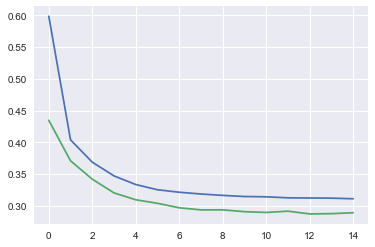

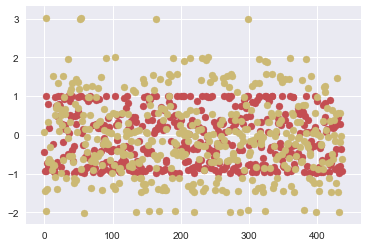

In [22]:
plt.plot(z.history['loss'])
plt.plot(z.history['val_loss'])
plt.show()
result=(lr_2.predict(x_test))
plt.scatter(range(y_test.shape[0]),result,c='r')
plt.scatter(range(y_test.shape[0]),y_test,c='y')
plt.show()

In [23]:
x=weat_2015['Month'].replace(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],[1,2,3,4,5,6,7,8,9,10,11,12])
weat_2015['Month']=x

In [24]:
weat_2015['sale']=0

In [25]:
#macro_rest=preprocessing.scale(macro_rest)

In [26]:
#macro_rest['Sales(In ThousandDollars)']=macro_rest['Sales(In ThousandDollars)'].fillna(0)
#macro_rest=preprocessing.scale(macro_rest)
#macro_df_1[67:67+5]=preprocessing.scale(macro_df_1[67:67+5])
weat_2015_1=pd.concat([weat_df_1[-10:],weat_2015])
weat_2015_2=pd.concat([weat_df_2[-10:],weat_2015])
weat_2015_3=pd.concat([weat_df_3[-10:],weat_2015])


In [27]:
weat_2015_1=weat_2015_1.reset_index(drop=True)
weat_2015_2=weat_2015_2.reset_index(drop=True)
weat_2015_3=weat_2015_3.reset_index(drop=True)

In [28]:
list(weat_2015_1)

['Year',
 'Month',
 'Day',
 'Temp avg (°C)',
 'Dew Point avg (°C)',
 'Humidity\xa0(%) avg',
 'Sea Level Press.\xa0(hPa) avg',
 'Visibility\xa0(km) avg',
 'Wind\xa0(km/h) avg',
 'sale']

In [29]:
weat_2015_1['Sea Level Press.\xa0(hPa) avg'][336:338]=1030
weat_2015_1['Wind\xa0(km/h) avg'][336:338]=8
weat_2015_2['Sea Level Press.\xa0(hPa) avg'][336:338]=1030
weat_2015_2['Wind\xa0(km/h) avg'][336:338]=8
weat_2015_3['Sea Level Press.\xa0(hPa) avg'][336:338]=1030
weat_2015_3['Wind\xa0(km/h) avg'][336:338]=8

C:\Users\Harsha\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Harsha\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Harsha\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is s

In [35]:
weat_2015_1['Sea Level Press.\xa0(hPa) avg'][341:343]=weat_2015_1['Sea Level Press.\xa0(hPa) avg'][340]
weat_2015_1['Wind\xa0(km/h) avg'][341:343]=weat_2015_1['Wind\xa0(km/h) avg'][340]

C:\Users\Harsha\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Harsha\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
weat_2015_1[weat_2015_1['Dew Point avg (°C)']=='-']

C:\Users\Harsha\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [37]:
lr_1.predict(preprocessing.scale(weat_2015_1[0:10]).reshape(1,10,10))

array([[-0.84484905]], dtype=float32)

In [40]:
pred1=[]
pred2=[]
pred3=[]
for i in range(weat_2015_1.shape[0]-8):
    #print(i)
    p=lr_1.predict(preprocessing.scale(weat_2015_1[i:i+10]).reshape(1,10,10))
    pred1.append((p*std_1)+mean_1)
    weat_2015_1['sale'][i+10]=pred1[i]
    q=lr_2.predict(preprocessing.scale(weat_2015_2[i:i+10]).reshape(1,10,10))
    pred2.append((p*std_2)+mean_2)
    weat_2015_2['sale'][i+10]=pred2[i]
    r=lr_3.predict(preprocessing.scale(weat_2015_3[i:i+10]).reshape(1,10,10))
    pred3.append((p*std_3)+mean_3)
    weat_2015_3['sale'][i+10]=pred3[i]

C:\Users\Harsha\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Harsha\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Harsha\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 

ValueError: could not convert string to float: '-'




pred_1=(lr_1.predict(macro_rest)*std_1)+mean_1
pred_2=(lr_2.predict(macro_rest)*std_2)+mean_2
pred_3=(lr_3.predict(macro_rest)*std_3)+mean_3



In [ ]:
mdays=[31,28,31,30,31,30,31,31,30,31,30,31]

In [ ]:
s=0
pred_1=[]
pred_2=[]
pred_3=[]
for i in range(12):
    pred_1.append(np.sum(pred1[s:s+mdays[i]])/mdays[i])
    pred_2.append(np.sum(pred2[s:s+mdays[i]])/mdays[i])
    pred_3.append(np.sum(pred3[s:s+mdays[i]])/mdays[i])

    s=s+mdays[i]

In [ ]:
pred_f=[]


for j in range(12):
    pred_f.append(pred_1[j])
    pred_f.append(pred_2[j]) 
    pred_f.append(pred_3[j]) 

In [ ]:
fil=open('subv_weatdatalstm.csv','w')
fil.write('Year,Sales(In ThousandDollars)\n')
for i in range(len(pred_f)-1):
    fil.write('%d,%d\n'%(i+1,pred_f[i]))
fil.write('%d,%d'%(i+2,pred_f[i+1]))
fil.close()

In [84]:
y_1=weat_df_1['sale']
y_2=weat_df_2['sale']
y_3=weat_df_3['sale']

weat_df_1=weat_df_1.drop(['sale'],axis=1)
weat_df_2=weat_df_2.drop(['sale'],axis=1)
weat_df_3=weat_df_3.drop(['sale'],axis=1)


KeyError: 'sale'

In [73]:
weat_2015_1=weat_2015_1[5:].drop(['sale'],axis=1)
weat_2015_2=weat_2015_2[5:].drop(['sale'],axis=1)
weat_2015_3=weat_2015_3[5:].drop(['sale'],axis=1)

In [79]:
mean_1=y_1.mean()
std_1=y_1.std()
mean_2=y_2.mean()
std_2=y_2.std()
mean_3=y_3.mean()
std_3=y_3.std()

In [116]:
svr_rbf_1 = DecisionTreeRegressor(random_state=0)#SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf_1.fit(preprocessing.scale(weat_df_1), preprocessing.scale(y_1))
svr_rbf_2 = DecisionTreeRegressor(random_state=0)#SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf_2.fit(preprocessing.scale(weat_df_2), preprocessing.scale(y_2))
svr_rbf_3 = DecisionTreeRegressor(random_state=0)#SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf_3.fit(preprocessing.scale(weat_df_3), preprocessing.scale(y_3))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [117]:
predsvr_1=(svr_rbf_1.predict(weat_2015_1)*y_1.std())+y_1.mean()
predsvr_2=(svr_rbf_2.predict(weat_2015_2)*y_2.std())+y_2.mean()
predsvr_3=(svr_rbf_3.predict(weat_2015_3)*y_3.std())+y_3.mean()

In [118]:
mdays=[31,28,31,30,31,30,31,31,30,31,30,31]
s=0
pred_1=[]
pred_2=[]
pred_3=[]
for i in range(12):
    pred_1.append(np.sum(predsvr_1[s:s+mdays[i]])/mdays[i])
    pred_2.append(np.sum(predsvr_2[s:s+mdays[i]])/mdays[i])
    pred_3.append(np.sum(predsvr_3[s:s+mdays[i]])/mdays[i])

    s=s+mdays[i]

In [119]:
pred_f=[]
for j in range(12):
    pred_f.append(pred_1[j])
    pred_f.append(pred_2[j]) 
    pred_f.append(pred_3[j])
fil=open('subv_weatsvrrbf2.csv','w')
fil.write('Year,Sales(In ThousandDollars)\n')
for i in range(len(pred_f)-1):
    fil.write('%d,%d\n'%(i+1,pred_f[i]))
fil.write('%d,%d'%(i+2,pred_f[i+1]))
fil.close()